In [1]:
from data_processing import *
from train_touch import *
from train_trace import *
from visualization import plot_segment

In [2]:
data = Dataset("set1_imu.csv", "set1_tab.csv")
data.data_set.head()

<class 'pandas.core.frame.DataFrame'>
merging the data sets...
calculate the quaternion representations...
calculate the rotation matrices...
calculate the navigation frame representation...
integrate the acceleration...


,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,x,...,r,nav_ax,nav_ay,nav_az,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z
0,43375070723400,733964,-0.634824,0.466391,0.584305,-0.686517,0.11501,0.06939,20.29,-125.0,...,"[[-0.11382636407015201, 0.3750248547647836, -0...",-0.290393,0.418746,0.838008,0.000000,0.000000,0.000000,-125.000000,727.000000,0.000000
1,43375082694400,733975,-0.624188,0.485592,0.616692,-0.383517,0.17861,0.16839,20.29,-125.0,...,"[[0.40367173193477623, -0.9091483282409087, 0....",-0.630255,0.604797,0.492665,-5.063563,5.629486,7.318703,-152.849595,757.962173,40.252865
2,43375093727500,733986,-0.652059,0.487532,0.576429,-0.221017,0.29831,0.27589,20.29,-125.0,...,"[[-0.3519163621500252, 0.8038031677093032, 0.4...",0.897829,0.402963,0.163287,-3.591903,11.172164,10.926440,-200.454658,850.371246,140.601148
3,43375104950600,733998,-0.622237,0.512819,0.557383,0.168683,0.37521,0.49819,20.29,-125.0,...,"[[-0.4890386249033041, -0.825427834650935, 0.2...",0.038171,0.216470,0.955260,2.024098,14.888762,17.637719,-209.861488,1006.736800,311.986101
4,43375116785300,734009,-0.613073,0.566541,0.545624,0.397183,0.34961,0.54099,20.25,-125.0,...,"[[0.07391306177843293, 0.5203295300117495, 0.8...",0.713670,0.691190,-0.086401,6.159223,19.880890,22.416440,-164.853221,1197.969884,532.283972


In [3]:
data.data_set.columns

Index(['host_timestamp', 'arduino_timestamp', 'ax', 'ay', 'az', 'gx', 'gy',
       'gz', 'temperature', 'x', 'y', 'z', 'in_range', 'touch', 'pressure',
       'reset', 'q0', 'q1', 'q2', 'q3', 'r', 'nav_ax', 'nav_ay', 'nav_az',
       'vel_x', 'vel_y', 'vel_z', 'pos_x', 'pos_y', 'pos_z'],
      dtype='object')

In [4]:
segments = []
labels = []
step = 5
for i in range(0, len(data.data_set) - step, step):
    xs = data.data_set['vel_x'].values[i: i + step]
    ys = data.data_set['vel_y'].values[i: i + step]
    zs = data.data_set['vel_z'].values[i: i + step]
    nav_x = data.data_set['nav_ax'].values[i: i + step]
    nav_y = data.data_set['nav_ay'].values[i: i + step]
    nav_z = data.data_set['nav_az'].values[i: i + step]
    # Retrieve the most often used label in this segment
    #x,y,z = data.data_set.loc[i: i + step,['x', 'y', 'z']].mean(axis=0)
    x,y,z = data.data_set.iloc[i: i + step, 9:12].mean(axis=0)
    segments.append([xs, ys, zs, nav_x, nav_y, nav_z])
    labels.append([x,y,z])

reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, step,6)
labels = np.asarray(labels)



In [5]:
labels

array([[-125.        ,  727.        ,    0.        ],
       [-125.        ,  727.        ,    0.        ],
       [-125.        ,  727.        ,    0.        ],
       ...,
       [ 421.30716411,  117.21286336,    0.        ],
       [ 421.30716411,  117.21286336,    0.        ],
       [ 421.30716411,  117.21286336,    0.        ]])

In [6]:
split = int(len(data.data_set) * (1- 0.2))
x,y,z = data.data_set.loc[split:, ['x','y','z']].mean(axis=0)
print(x,y,z)


480.7798854168702 266.47606039629284 737.7273850489355


In [7]:
#plot_segment(data.data_set)

Split into test and trainings data...
Create segments and labels...
Create segments and labels...
The trainings data is of shape (12027, 80) and (12027, 3) and the test data is of shape (3006, 80) and (3006, 3)
Create the LSTM model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 5, 16)             0         
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 74,627
Trainable params: 74,627
Non-trainable params: 0
_________________________________________________________________
None
Fitting model...
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epo

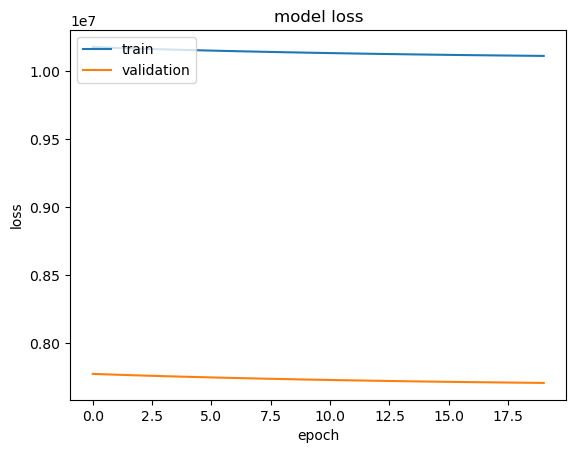

Use  model on test data...
94/94 [==============================] - 1s 2ms/step
The loss on the test data is 5485735.0
[[234.05907 201.66463   0.     ]
 [234.0608  201.66609   0.     ]
 [234.0608  201.66614   0.     ]
 [234.0596  201.66512   0.     ]
 [234.06082 201.66612   0.     ]
 [234.05962 201.66515   0.     ]
 [234.05919 201.66472   0.     ]
 [234.06078 201.66609   0.     ]
 [234.05867 201.66429   0.     ]
 [234.06078 201.66603   0.     ]]
[234.05907 234.0608  234.0608  234.0596  234.06082]
[201.66463 201.66609 201.66614 201.66512 201.66612]


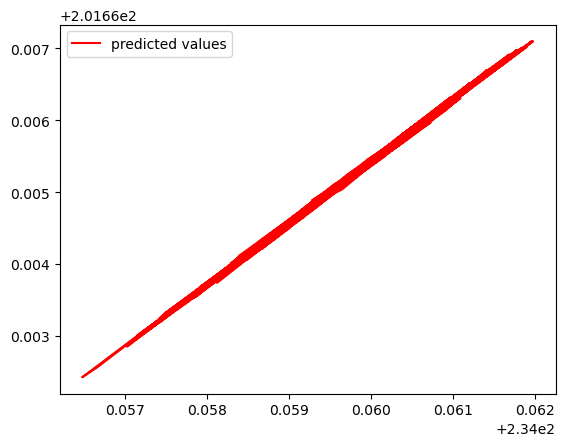

In [8]:
model = PredictionModelTrace(data.data_set)

In [9]:
#model = PredictionModel(data.data_set)